# Least Squares Approximation

We generate a random matrix $A$ and vector $b$, and find the least squares approximation to it (i.e., the vector $x$ such that $\lVert Ax-b \rVert_2$ is minimized).

In [27]:
import numpy as np
from time import perf_counter
from matplotlib import pyplot as plt
from tqdm import tqdm

In [28]:
dims = np.arange(100, 2000, step=50)

In [38]:
def ls(dims):
    times = []
    errors = []
    for n in tqdm(dims):
        m = 2 * n
    
        A = np.random.randn(m,n)
        b = np.random.randn(m,1)

        start = perf_counter()

        q,r = np.linalg.qr(A)
        qt = np.transpose(q)
        c = qt @ b

        rinv = np.linalg.inv(r)
        xls = rinv @ c

        end = perf_counter()
        times.append(end - start)
        errors.append(A@xls - b)
    for i in range(38):
        print(errors[i])
    return times


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:35<00:00,  1.07it/s]


[[ 0.22725949]
 [-0.40711036]
 [-0.19258822]
 [ 0.31328504]
 [-0.05325718]
 [-0.42297735]
 [-0.42515746]
 [ 0.14675257]
 [ 0.45794828]
 [ 0.07480759]
 [ 0.16039264]
 [-0.58984352]
 [ 0.76029819]
 [ 0.410448  ]
 [ 0.22200269]
 [ 0.88388766]
 [-0.04172949]
 [-0.73131623]
 [-0.01626064]
 [-0.41117752]
 [-1.32613545]
 [ 0.14064895]
 [ 0.63742051]
 [-0.47651916]
 [-0.54581645]
 [ 0.21840462]
 [-0.29881145]
 [ 0.52924028]
 [-0.85463311]
 [ 0.48117087]
 [-0.07571843]
 [ 0.33303873]
 [-0.63226155]
 [ 0.68237117]
 [-0.09479801]
 [ 0.63430127]
 [ 0.38005301]
 [ 0.54498352]
 [ 0.28349032]
 [ 0.13347521]
 [-0.22003366]
 [ 1.0415658 ]
 [-0.50400023]
 [ 0.58269874]
 [-0.57827857]
 [-0.46530197]
 [-0.55193742]
 [ 0.27370379]
 [ 0.2111123 ]
 [-0.12944912]
 [-0.09796066]
 [-0.31334854]
 [ 0.75784687]
 [-0.27912716]
 [ 0.12574245]
 [-0.34282942]
 [-0.80258119]
 [-0.65416651]
 [-0.14848989]
 [-0.18457624]
 [-0.58323773]
 [ 1.00309462]
 [-0.81666907]
 [ 1.13938165]
 [ 0.10522294]
 [ 0.19109208]
 [ 0.58182

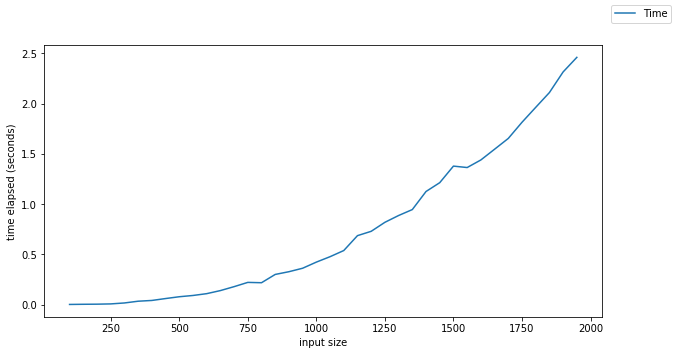

In [39]:
times = ls(dims)
fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlabel('input size')

ax.plot(dims, times, label='Time')
ax.set_ylabel('time elapsed (seconds)')

fig.legend(loc='upper right')

In [36]:
def rls(dims):    
    times = []
    errors = []
    iterations = 100
    for n in tqdm(dims):
        m = 2 * n
    
        A = np.random.randn(m,n)
        b = np.random.randn(m,1)
        def calc_norm(x):
            return np.linalg.norm(A@x - b)
        x_sol = np.random.randn(n,1)
        start = perf_counter()
        for i in range(iterations):
            x = np.random.randn(n,1)
            x_sol = min(x,x_sol,key = calc_norm)
        end = perf_counter()
        times.append(end - start)
        errors.append(A@x_sol - b)
    return times


100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:17<00:00,  2.19it/s]


[[-14.61265346]
 [ -1.93668144]
 [ -7.76529333]
 [ -6.28031345]
 [ -1.79737359]
 [  1.2896295 ]
 [ -7.01929283]
 [ -7.66432708]
 [ 11.47439121]
 [ -1.40469079]
 [ -9.99712277]
 [  5.8869222 ]
 [-11.71308525]
 [ 15.76150017]
 [  4.41944504]
 [ -2.30521677]
 [ -6.88233601]
 [ -0.51214733]
 [ -0.10067237]
 [  3.94613688]
 [ 11.56318603]
 [  7.92457329]
 [  2.52604672]
 [ -1.75497046]
 [  0.98263285]
 [  7.94976028]
 [ 11.97094975]
 [ -9.12263413]
 [  4.8821604 ]
 [  3.97994599]
 [ -7.96607254]
 [ -3.63225874]
 [ -6.70116208]
 [  7.18422057]
 [  2.70922474]
 [  8.49342834]
 [-12.44185141]
 [ -8.31234142]
 [ -0.04398962]
 [ 13.83128423]
 [ -8.74322563]
 [ -5.39079211]
 [ -8.96490359]
 [ -7.78220884]
 [ -3.59416209]
 [  0.85877684]
 [ -1.70306834]
 [  1.14691957]
 [  5.06568712]
 [  7.42601818]
 [  4.73214644]
 [  8.12374173]
 [ -0.4377297 ]
 [-13.48133048]
 [ -1.54011896]
 [  4.44261399]
 [  4.54002919]
 [ -1.90244322]
 [ -1.89758886]
 [ 10.56708749]
 [ -0.33821525]
 [  0.28596666]
 [-14.07

ValueError: x, y, and format string must not be None

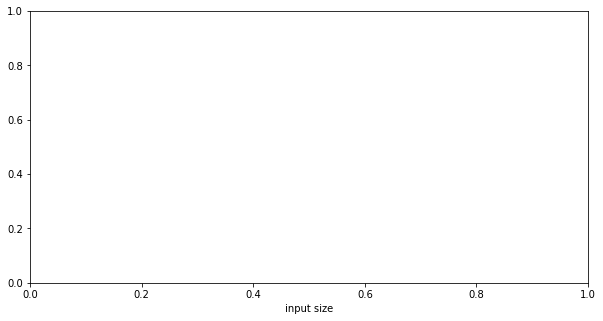

In [37]:
times2 = rls(dims)
fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlabel('input size')

ax.plot(dims, times2, label='Time')
ax.set_ylabel('time elapsed (seconds)')

fig.legend(loc='upper right')